In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
d_fn = "./../drawing/canvasses.npy"
drawings = np.load(d_fn)

In [9]:
drawings.shape

(10, 100, 16384)

[20]
(10, 2)
0 0.0028863829 -0.011187215 -0.010457483 0.0015950955
1 0.009149034 -0.035418052 -0.033112757 0.0050505013
2 0.017982706 -0.069546446 -0.065025225 0.009917634
3 0.028020523 -0.108288616 -0.10125393 0.0154429665
4 0.03842218 -0.14841093 -0.13877472 0.021165328
5 0.048855104 -0.18863966 -0.17639619 0.026903024
6 0.059219737 -0.22859679 -0.21376452 0.0326021
7 0.06950318 -0.26823592 -0.2508361 0.03825591
8 0.07971962 -0.30761364 -0.28766364 0.04387249
9 0.089887895 -0.34680358 -0.3243159 0.049462333


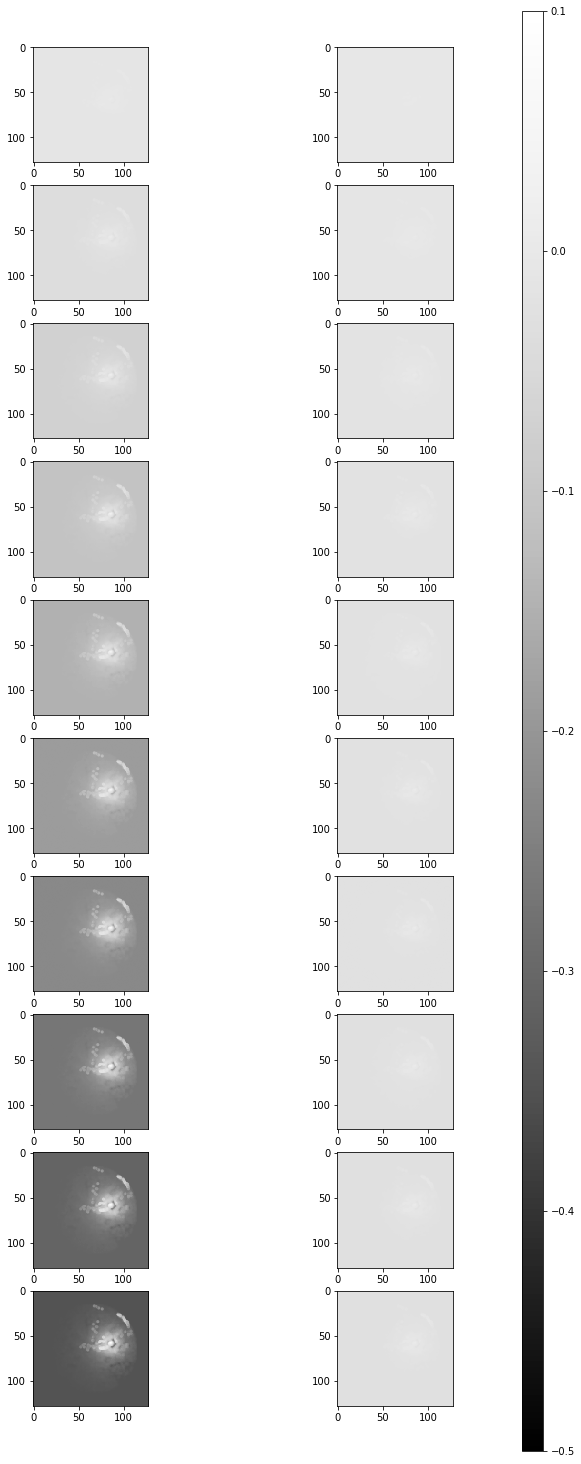

In [22]:
T = drawings.shape[0]
n_plots = 2
which = np.random.randint(0, drawings.shape[1], (1,))
ref = 1
print(which)

fig, ax = plt.subplots(nrows=T, ncols=n_plots, figsize=(10, 25) )
print(ax.shape)

for t in range(T):
    ao = ax[t]
    w = which[0]
    normal = drawings[t][w].reshape((128, 128)) #- drawings[0][w].reshape((128, 128))
    delta = drawings[t][w].reshape((128, 128)) - drawings[t][ref].reshape((128, 128))
    ao[0].imshow(normal, vmin=-0.5, vmax=0.1, cmap="Greys_r")
    im = ao[1].imshow(delta, vmin=-0.5, vmax=0.1, cmap="Greys_r")
    print(t, np.max(normal), np.min(normal), np.average(normal), np.std(normal))
    
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
fig.colorbar(im, cax=cax)

In [11]:
finished = drawings[-1:,:,].reshape((100, 128, 128))

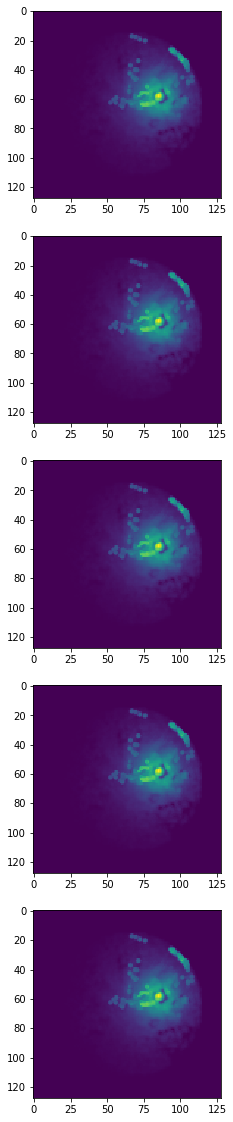

In [12]:
fig, axs = plt.subplots(5, figsize=(10, 20))
[ax.imshow(finished[i]) for i, ax in enumerate(axs)]